In [1]:
# used octave.m to build A and B
import csv
import math
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt

EPS = 1e-4


def load_csv(filename):
    data1 = []
    with open(filename) as csvfile:
        spamreader = csv.reader(csvfile, delimiter=";")
        for row in spamreader:
            data1.append([float(row[0]), float(row[0])])
    return data1


def load_octave(filename):
    A = 0
    B = 0
    w = []
    with open(filename) as f:
        A, B = [float(t) for t in f.readline().split()]
        for line in f.readlines():
            w.append(float(line))
    return A, B, w


def load_octave_yint(filename):
    data = []

    with open(filename, 'r') as file:
        for line in file:
            line = line.strip()  # Удаление лишних пробелов и символов перевода строки
            if line:  # Проверка, что строка не пустая
                value = float(line)  # Преобразование строки в число
                data.append(value)  # Добавление числа в список
    return data


def plot_interval(y, x, color='b', label1=""):
    if (x == 1):
        plt.vlines(x, y[0], y[1], color, lw=1, label=label1)
    else:
        plt.vlines(x, y[0], y[1], color, lw=1)


def plot_interval_hist(x, color='b', label1=""):
    min_value = x[0][0]
    max_value = x[-1][1]
    step = 0.0001
    bins = [min_value + step * i for i in range(math.ceil((max_value - min_value) / step))]
    hist = [(t[1] + t[0]) / 2 for t in x]
    cur_value = 0
    # for el in combined_values:
    #    if left_values.count(el) > 0:
    #        cur_value += 1
    #    if right_values.count(el) > 0:
    #        cur_value -= 1
    #    hist = hist + [el] * cur_value

    plt.hist(hist, color=color, label=label1, rwidth=0.8)


200


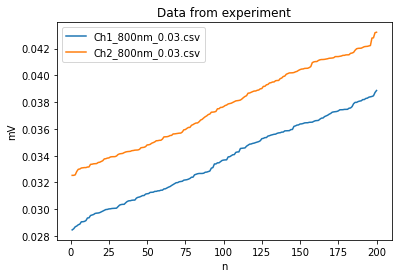

<Figure size 432x288 with 0 Axes>

In [14]:
if __name__ == "__main__":
    data1 = load_csv('data/3/Ch1_800nm_0.03.csv')
    data2 = load_csv('data/3/Ch2_800nm_0.03.csv')
    data1_A, data1_B, data1_w = load_octave('data/Ch1.txt')
    data2_A, data2_B, data2_w = load_octave('data/Ch2.txt')
    data_n = [t for t in range(1, len(data1) + 1)]
    # plot data together
    plt.plot(data_n, [data1[i][0] for i in range(len(data1))], label='Ch1_800nm_0.03.csv')
    plt.plot(data_n, [data2[i][0] for i in range(len(data2))], label='Ch2_800nm_0.03.csv')
    plt.legend()
    plt.title('Data from experiment')
    plt.xlabel('n')
    plt.ylabel('mV')
    plt.savefig("report/pics/input_data.png")
    plt.figure()
    print(len(data1))
    

In [2]:
if __name__ == "__main__":
    data1 = load_csv('C:/Users/arina/Documents/funny/lab3/stats/Ch1_800nm_0.23mm.csv')
    data2 = load_csv('C:/Users/arina/Documents/funny/lab3/stats/Ch2_800nm_0.23mm.csv')
    data_n = [t for t in range(1, len(data1) + 1)]


200


<Figure size 432x288 with 0 Axes>

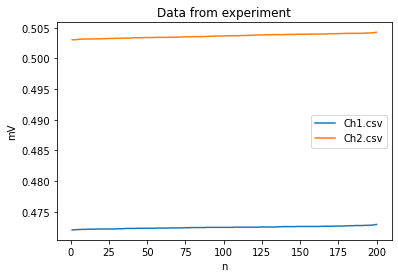

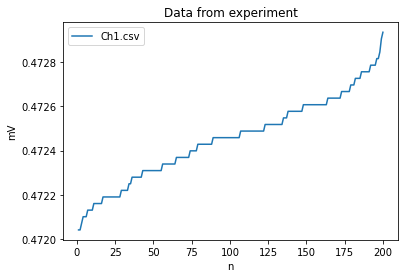

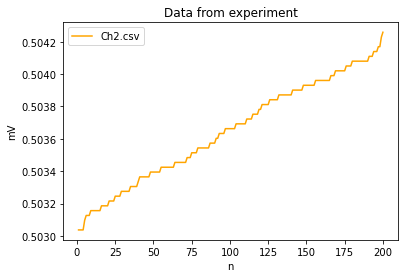

<Figure size 432x288 with 0 Axes>

In [48]:
    # plot data together
    plt.plot(data_n, [data1[i][0] for i in range(len(data1))], label='Ch1.csv')
    plt.plot(data_n, [data2[i][0] for i in range(len(data2))], label='Ch2.csv')
    plt.legend()
    plt.title('Data from experiment')
    plt.xlabel('n')
    plt.ylabel('mV')
    plt.savefig("report/pics/input_data.png")
    plt.figure()
    
    
    plt.plot(data_n, [data1[i][0] for i in range(len(data1))], label='Ch1.csv')
    #plt.plot(data_n, data1, label='Ch1.csv')
    #plt.plot(data_n, [data2[i] for i in range(len(data2))], label='Ch2.csv')
    plt.legend()
    plt.title('Data from experiment')
    plt.xlabel('n')
    plt.ylabel('mV')
    plt.savefig("report/pics/input_data.png")
    plt.figure()
    
    print(len(data2))
    
    # plot data2
    #plt.plot(data_n, [data1[i] for i in range(len(data1))], label='Ch1.csv')
    plt.plot(data_n, [data2[i][0] for i in range(len(data2))], color ="orange", label='Ch2.csv')
    plt.legend()
    plt.title('Data from experiment')
    plt.xlabel('n')
    plt.ylabel('mV')
    plt.savefig("report/pics/input_data.png")
    plt.figure()

<Figure size 432x288 with 0 Axes>

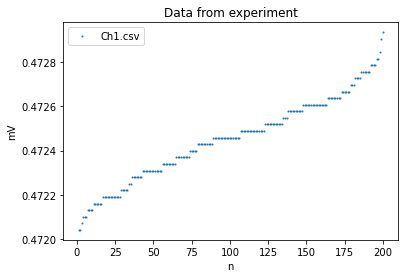

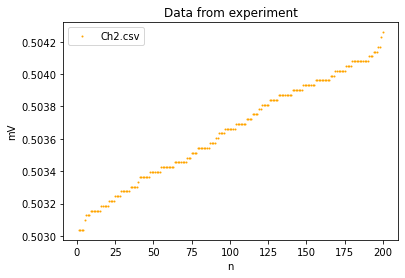

<Figure size 432x288 with 0 Axes>

In [5]:
    # plot data1
    #print(data1)
    plt.plot(data_n, [data1[i][0] for i in range(len(data1))], 'o', markersize=1, label='Ch1.csv')
    #plt.plot(data_n, data1, label='Ch1.csv')
    #plt.plot(data_n, [data2[i] for i in range(len(data2))], label='Ch2.csv')
    plt.legend()
    plt.title('Data from experiment')
    plt.xlabel('n')
    plt.ylabel('mV')
    #plt.yticks(np.arange(0.1005, 0.1020, 0.0004))
    plt.savefig("report/pics/input_data.png")
    plt.figure()
    
    
        # plot data2
    #plt.plot(data_n, [data1[i] for i in range(len(data1))], label='Ch1.csv')
    plt.plot(data_n, [data2[i][0] for i in range(len(data2))], 'o', markersize=1, color ="orange", label='Ch2.csv')
    plt.legend()
    plt.title('Data from experiment')
    plt.xlabel('n')
    plt.ylabel('mV')
    plt.savefig("report/pics/input_data.png")
    plt.figure()

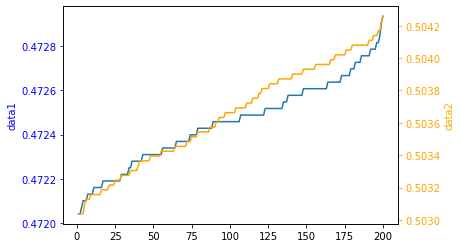

In [6]:
# Создание фигуры и осей
fig, ax1 = plt.subplots()
# Создание второй шкалы Y
ax2 = ax1.twinx()

# Построение первой линии
ax1.plot(data_n, [data1[i][0] for i in range(len(data1))], label='Ch1.csv')
ax1.set_ylabel('data1', color='b')
ax1.tick_params('y', colors='b')

# Построение второй линии
ax2.plot(data_n, [data2[i][0] for i in range(len(data2))], color = 'orange', label='Ch2.csv')
ax2.set_ylabel('data2', color='orange')
ax2.tick_params('y', colors='orange')

plt.show()

<Figure size 432x288 with 0 Axes>

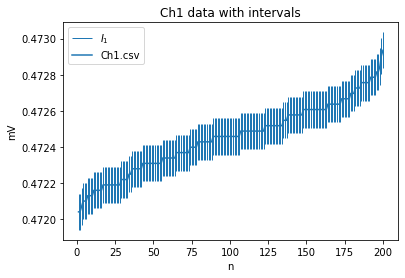

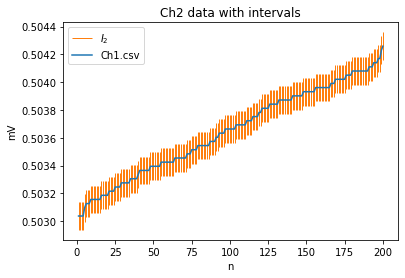

<Figure size 432x288 with 0 Axes>

In [3]:
    data1_e = [[data1[i][0] - EPS, data1[i][1] + EPS] for i in range(len(data1))]
    data2_e = [[data2[i][0] - EPS, data2[i][1] + EPS] for i in range(len(data2))]
    
    # plot first
    for i in range(len(data1_e)):
        plot_interval(data1_e[i], data_n[i], 'C0', "$I_1$")
        
    plt.plot(data_n, [data1[i][0] for i in range(len(data1))], label='Ch1.csv')
    plt.legend()
    plt.title('Ch1 data with intervals')
    plt.xlabel('n')
    plt.ylabel('mV')
    plt.savefig("report/pics/data1_interval.png")
    #plt.axis([0,200, 0.1005, 0.1020])
    plt.figure()

    # plot second
    for i in range(len(data2_e)):
        plot_interval(data2_e[i], data_n[i], 'C1', "$I_2$")
    
    plt.plot(data_n, [data2[i][0] for i in range(len(data2))], label='Ch1.csv')
    plt.legend()
    plt.title('Ch2 data with intervals')
    plt.xlabel('n')
    plt.ylabel('mV')
    plt.savefig("report/pics/data2_interval.png")
    #plt.axis([0,200, 0.08600, 0.0872])
    plt.figure()

In [4]:
data1_e_min = min([x[0] for x in data1_e])
data1_e_max = max([x[1] for x in data1_e])

data2_e_min = min([x[0] for x in data2_e])
data2_e_max = max([x[1] for x in data2_e])
print (data1_e_min, data1_e_max)
print (data2_e_min, data2_e_max)

0.4719408 0.4730349
0.5029371 0.504359


In [5]:
j1 = data1_e_max - data1_e_min
j2 = data2_e_max - data2_e_min
print(j1, j2)

0.0010940999999999867 0.001421899999999976


## Оценка R (грубая)

In [6]:
r_out1 = data2_e_min / data1_e_max
r_out2 = data2_e_max / data1_e_min
print(r_out1)
print(r_out2)

1.0632135176495434
1.0686912426304316


In [7]:
wid_r_out = r_out2 - r_out1
print(wid_r_out)

0.005477724980888166


In [5]:
#не надо 

def find_mode(X):
    intervals = []
    for xi in X:
        intervals.append(xi[0])
        intervals.append(xi[1])
    intervals.sort()
    freqs = [0] * (2 * len(X) - 1)
    for i in range(len(intervals) - 1):
        zi = [intervals[i], intervals[i+1]]
        for j in range(len(X)):
            xi = X[j]
            if xi[0] <= zi[0] and xi[1] >= zi[1]:
                freqs[i] += 1
    max_freq = max(freqs)
    if max_freq == 0:
        return None, None
    modes = []
    for i in range(len(freqs)):
        if freqs[i] == max_freq:
            modes.append([intervals[i], intervals[i+1]])
    return modes, max_freq


In [6]:
#к предыдущему - не надо 

modes, freq = find_mode(data1_e)
print("Mode(s):", modes)
print("Frequency:", freq)

Mode(s): [[0.4725071, 0.4725071], [0.4725071, 0.4725071], [0.4725071, 0.4725071], [0.4725071, 0.4725071], [0.4725071, 0.4725071], [0.4725071, 0.4725071], [0.4725071, 0.4725071], [0.4725071, 0.4725071], [0.4725071, 0.4725071], [0.4725071, 0.4725071], [0.4725071, 0.4725071], [0.4725071, 0.4725071], [0.4725071, 0.4725071], [0.4725071, 0.4725071], [0.4725071, 0.4725071], [0.4725071, 0.4725283], [0.4725283, 0.4725283], [0.4725283, 0.4725283], [0.4725283, 0.4725283], [0.4725283, 0.4725283], [0.4725283, 0.4725283], [0.4725283, 0.4725283], [0.4725283, 0.4725283], [0.4725283, 0.4725283], [0.4725283, 0.4725283]]
Frequency: 85


In [4]:
#не надо 
import numpy as np

def imodeR(S):
    n = S.shape[0]
    bounds = np.tile([1, -1], (n, 1))
    Ss = np.sort(S.flatten())
    idx = S.flatten().argsort()
    bounds_sorted = bounds[idx]
    freqs = np.cumsum(bounds_sorted)

    if freqs.ndim > 1:
        freqs = freqs[:, 0]

    if len(np.shape(S)) > 1:
        Ss = np.unique(Ss)

    if len(np.shape(S)) > 1 or freqs[-1] != 0:
        T = np.column_stack((Ss, bounds[idx], freqs))
        Tu, _, Tu_ic = np.unique(T[:, [0, 1]], axis=0, return_index=True, return_inverse=True)
        count = np.histogram(Tu_ic, bins=np.arange(np.max(Tu_ic) + 2))[0]
        nonunique_idx = np.where(count > 1)[0]

        for k in nonunique_idx:
            group_idx = np.where(Tu_ic == k)[0]
            z = T[group_idx[0], 1]
            mx = z * np.max(z * freqs[group_idx])
            T[group_idx, 2] = mx

        T[:, 1] = -T[:, 1]
        Tu = np.unique(T, axis=0)
        freqs = Tu[:-1, 2]
        Ss = Tu[:, 0]

    modefreq = np.max(freqs)
    argmax = np.where(freqs == modefreq)[0]
    mode = np.column_stack((Ss[argmax], Ss[argmax + 1]))

    return mode, modefreq, freqs, Ss


In [4]:
def find_mode(intervals):
    n = len(intervals)
    bounds = [[interval[0], 1] for interval in intervals] + [[interval[1], -1] for interval in intervals]
    bounds_sorted = sorted(bounds, key=lambda x: x[0])
    freqs = [0] * (2 * n)
    for i in range(1, len(bounds_sorted)):
        freqs[i] = freqs[i-1] + bounds_sorted[i][1]
    Ss = [bounds_sorted[i][0] for i in range(len(bounds_sorted))]
    modefreq = max(freqs)
    argmax = [i for i, freq in enumerate(freqs) if freq == modefreq]
    mode = [[Ss[arg], Ss[arg+1]] for arg in argmax]
    return mode, modefreq, freqs, Ss


In [210]:
mode1, modefreq1, freqs1, Ss1 = find_mode(data1_e)
print("Mode(s):", mode1)
print("Frequency:", modefreq1)
print("freqs:", freqs1)
print("Ss:", Ss1)

Mode(s): [[0.4725071, 0.4725283]]
Frequency: 84
freqs: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 31, 30, 31, 32, 31, 32, 33, 34, 35, 36, 37, 38, 37, 36, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 47, 46, 45, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 52, 51, 50, 49, 48, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 45, 46, 47, 48, 49, 48, 47, 46, 45, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 53, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 69, 68, 67, 66, 65, 64, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 70, 71, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 72, 71, 70, 69, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82

In [211]:
len(freqs1)

400

<Figure size 432x288 with 0 Axes>

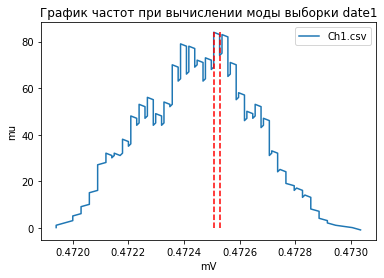

<Figure size 432x288 with 0 Axes>

In [40]:
    mode, modefreq, freqs, Ss= mode1, modefreq1, freqs1, Ss1
    
    plt.plot(Ss, freqs, label='Ch1.csv')
    plt.plot([mode[0][0], mode[0][0]], [0, modefreq], '--r')  # первая пунктирная красная линия
    plt.plot([mode[0][1], mode[0][1]], [0, modefreq], '--r')  # вторая пунктирная красная линия
    plt.legend()
    plt.title('График частот при вычислении моды выборки date1')
    plt.xlabel('mV')
    plt.ylabel('mu')
    plt.savefig("report/pics/data1_mode.png")
    plt.figure()

In [5]:
def plot_interval_1(y, x, mode, color='b', label1=""):
    if (x == 1):
        plt.vlines(x, y[0], y[1], color, lw=1, label=label1)
    else:
        for intv in mode:
            if ((intv[0] >= y[0] and intv[0] <= y[1]) or (intv[1] >= y[0] and intv[1] <= y[1])):
                plt.vlines(x, y[0], y[1], color='r', lw=1)
                break
        else:
            plt.vlines(x, y[0], y[1], color, lw=1)

<Figure size 432x288 with 0 Axes>

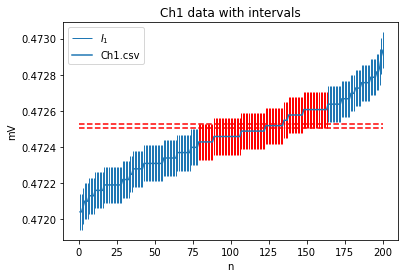

<Figure size 432x288 with 0 Axes>

In [29]:
    # plot first
    for i in range(len(data1_e)):
        plot_interval_1(data1_e[i], data_n[i], mode, 'C0', "$I_1$")
    
    plt.plot([0, len(data_n)], [mode[0][0], mode[0][0]], '--r')
    plt.plot([0, len(data_n)], [mode[0][1], mode[0][1]], '--r')
    plt.plot(data_n, [data1[i][0] for i in range(len(data1))], label='Ch1.csv')
    plt.legend()
    plt.title('Ch1 data with intervals')
    plt.xlabel('n')
    plt.ylabel('mV')
    plt.savefig("report/pics/data1_interval.png")
    #plt.axis([0,200, 0.1005, 0.1020])
    plt.figure()

In [132]:
mode2, modefreq2, freqs2, Ss2 = find_mode(data2_e)
print("Mode(s):", mode2)
print("Frequency:", modefreq2)
print("freqs:", freqs2)
print("Ss:", Ss2)

Mode(s): [[0.5039206, 0.5039418], [0.5039802, 0.5040014]]
Frequency: 49
freqs: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 22, 21, 20, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 28, 29, 30, 31, 32, 33, 32, 31, 30, 31, 30, 29, 28, 27, 26, 25, 24, 25, 26, 27, 28, 29, 30, 31, 30, 29, 28, 27, 26, 27, 28, 29, 30, 31, 32, 33, 32, 31, 30, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 37, 36, 35, 34, 35, 36, 37, 38, 39, 40, 41, 42, 41, 40, 39, 38, 37, 36, 37, 38, 39, 38, 37, 36, 35, 34, 35, 36, 37, 38, 37, 38, 39, 40, 41, 42, 43, 44, 45, 44, 43, 42, 41, 40, 39, 38, 39, 40, 41, 42, 41, 40, 39, 38, 37, 36, 35, 36, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 29, 30, 31, 32, 31, 30, 29, 28, 27, 26, 25, 24, 25, 26, 27, 28, 29, 30, 31, 30, 29, 28, 29, 30, 31, 32, 33, 34, 35, 34, 33, 32, 31, 32, 33, 34, 35, 34, 33, 32, 31, 30, 29, 28, 27, 28, 29, 30, 31, 30, 29, 28, 27, 28, 29, 28, 27, 28, 29, 30, 31, 32, 31, 30, 29, 28, 29, 30, 31, 32, 33, 34, 33, 32, 31, 30, 29, 28

<Figure size 432x288 with 0 Axes>

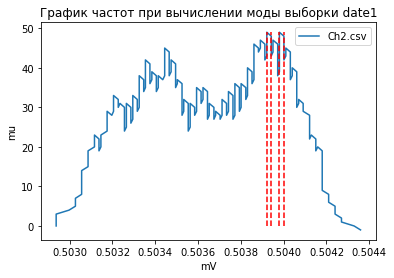

<Figure size 432x288 with 0 Axes>

In [31]:
    mode, modefreq, freqs, Ss= mode2, modefreq2, freqs2, Ss2
    
    plt.plot(Ss, freqs, label='Ch2.csv')
    plt.plot([mode[0][0], mode[0][0]], [0, modefreq], '--r')
    plt.plot([mode[0][1], mode[0][1]], [0, modefreq], '--r')
    plt.plot([mode[1][0], mode[1][0]], [0, modefreq], '--r')
    plt.plot([mode[1][1], mode[1][1]], [0, modefreq], '--r')
    plt.legend()
    plt.title('График частот при вычислении моды выборки date1')
    plt.xlabel('mV')
    plt.ylabel('mu')
    plt.savefig("report/pics/data2_mode.png")
    plt.figure()

<Figure size 432x288 with 0 Axes>

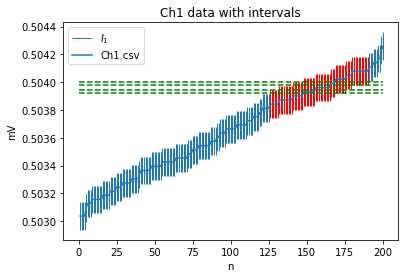

<Figure size 432x288 with 0 Axes>

In [32]:
    # second first
    for i in range(len(data2_e)):
        plot_interval_1(data2_e[i], data_n[i], mode, 'C0', "$I_1$")
    
    plt.plot([0, len(data_n)], [mode[0][0], mode[0][0]], '--g')
    plt.plot([0, len(data_n)], [mode[0][1], mode[0][1]], '--g')
    plt.plot([0, len(data_n)], [mode[1][0], mode[1][0]], '--g')
    plt.plot([0, len(data_n)], [mode[1][1], mode[1][1]], '--g')
    plt.plot(data_n, [data2[i][0] for i in range(len(data1))], label='Ch1.csv')
    plt.legend()
    plt.title('Ch1 data with intervals')
    plt.xlabel('n')
    plt.ylabel('mV')
    plt.savefig("report/pics/data1_interval.png")
    #plt.axis([0,200, 0.1005, 0.1020])
    plt.figure()

# Оскорбин 

In [6]:
from scipy.optimize import linprog

def estimate_uncertainty_center(intervals):
    n = len(intervals)
    y = np.mean(intervals, axis=1)
    e = np.diff(intervals, axis=1) / 2
    A = np.vstack((np.hstack((np.ones((n, 1)), -e)),
                   np.hstack((-np.ones((n, 1)), -e))))
    b = np.hstack((y, -y))
    c = np.array([0, 1])
    bounds = ((None, None), (0, None))
    res = linprog(c, A_ub=A, b_ub=b, bounds=bounds)
    if res.success:
        oskorbin_center, k = res.x
        return oskorbin_center, k
    else:
        return None, None


In [8]:
oskorbin_center, w = estimate_uncertainty_center(data1_e)
print(oskorbin_center, w)

0.47248785 4.470500000000536


In [15]:
ji1Z = countJakkar(data1_w)
#ji2Z = countJakkar(data2_fixedZ)

print(ji1Z)

6.208606557572289e-14


<Figure size 432x288 with 0 Axes>

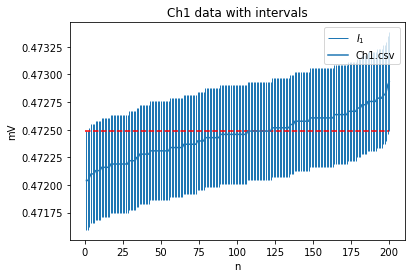

<Figure size 432x288 with 0 Axes>

In [9]:
    data1_w = [[data1[i][0] - w * EPS, data1[i][1] + w * EPS] for i in range(len(data1))]
    #data2_w = [[data2[i][0] - w * EPS, data2[i][1] + w * EPS] for i in range(len(data2))]

    # plot first
    for i in range(len(data1_w)):
        plot_interval(data1_w[i], data_n[i], 'C0', "$I_1$")
    
    plt.plot([0, len(data_n)], [oskorbin_center, oskorbin_center], '--r')
    plt.plot(data_n, [data1[i][0] for i in range(len(data1))], label='Ch1.csv')
    plt.legend()
    plt.title('Ch1 data with intervals')
    plt.xlabel('n')
    plt.ylabel('mV')
    plt.savefig("report/pics/data1_w_interval.png")
    #plt.axis([0,200, 0.1005, 0.1020])
    plt.figure()

In [150]:
oskorbin_center, w = estimate_uncertainty_center(data2_e)
print(oskorbin_center, w)

0.503648 6.110000000000955


<Figure size 432x288 with 0 Axes>

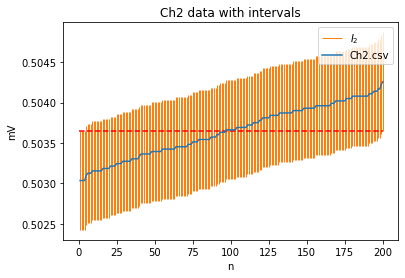

<Figure size 432x288 with 0 Axes>

In [151]:
    data2_w = [[data2[i][0] - w * EPS, data2[i][1] + w * EPS] for i in range(len(data2))]
    
    # plot second
    for i in range(len(data2_w)):
        plot_interval(data2_w[i], data_n[i], 'C1', "$I_2$")
    
    plt.plot([0, len(data_n)], [oskorbin_center, oskorbin_center], '--r')
    plt.plot(data_n, [data2[i][0] for i in range(len(data2))], label='Ch2.csv')
    plt.legend()
    plt.title('Ch2 data with intervals')
    plt.xlabel('n')
    plt.ylabel('mV')
    plt.savefig("report/pics/data2_w_interval.png")
    #plt.axis([0,200, 0.08600, 0.0872])
    plt.figure()

# Жаккар

In [7]:
def countJakkar(data):
    min_inc = list(data[0])
    max_inc = list(data[0])
    for interval in data:
        min_inc[0] = max(min_inc[0], interval[0])
        min_inc[1] = min(min_inc[1], interval[1])
        max_inc[0] = min(max_inc[0], interval[0])
        max_inc[1] = max(max_inc[1], interval[1])
    JK = (min_inc[1] - min_inc[0]) / (max_inc[1] - max_inc[0])
    return JK

In [22]:
ji1 = countJakkar(data1_e)
ji2 = countJakkar(data2_e)

print(ji1, ji2)

-0.6344027054200158 -0.7186862648569079


In [8]:
def roMode(data, mode):
    #min_inc = list(data[0])
    max_inc = list(data[0])
    for interval in data:
        #min_inc[0] = max(min_inc[0], interval[0])
        #min_inc[1] = min(min_inc[1], interval[1])
        max_inc[0] = min(max_inc[0], interval[0])
        max_inc[1] = max(max_inc[1], interval[1])
    
    maxm = max([x[1] for x in data])
    minm = min([x[0] for x in data])
    mode_min = min([x[0] for x in mode])
    mode_max = max([x[1] for x in mode])
    wid_mode = mode_max - mode_min
    
    
    
    #print('bb', maxm, minm)
    #print('aa', max_inc[1], max_inc[0])
    #wid_mode = mode[0][1] - mode[0][0]
    #print(mode[0][0])
    #print(mode[0][1])
    #print(wid_mode)
    
    #ro = (wid_mode) / (maxm - minm)
    ro = (wid_mode) / (max_inc[1] - max_inc[0]) #одинаковый результат с верхним
    return ro

In [90]:
ro1 = roMode(data1_e, mode1)
ro2 = roMode(data2_e, mode2)
print(ro1)
print(ro2)

0.01919561243143835
0.056258790435982454


# Восстановление зависимотей 

In [9]:
    data1_A, data1_B, data1_w = load_octave('data/Ch1.txt')
    data2_A, data2_B, data2_w = load_octave('data/Ch2.txt')
    data1_yint1 = load_octave_yint('data/yint1.txt')
    data2_yint2 = load_octave_yint('data/yint2.txt')
    
    print(len(data1_yint1), len(data2_yint2))
    #print(data2_yint2)

200 200


In [10]:
    data1_r = [[data1[i][0] - data1_w[i] * EPS, data1[i][1] + data1_w[i] * EPS] for i in range(len(data1))]
    data2_r = [[data2[i][0] - data2_w[i] * EPS, data2[i][1] + data2_w[i] * EPS] for i in range(len(data2))]

<Figure size 432x288 with 0 Axes>

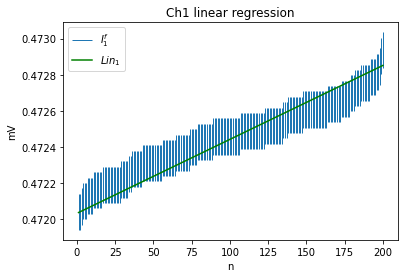

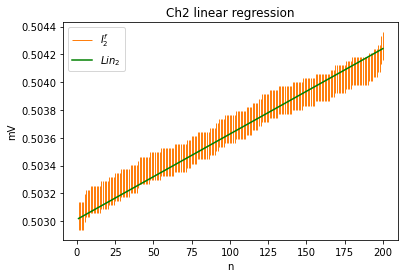

<Figure size 432x288 with 0 Axes>

In [79]:
    # plot first
    for i in range(len(data1_r)):
        plot_interval(data1_r[i], data_n[i], 'C0', "$I_1^f$")

    plt.plot([data_n[0], data_n[-1]], [data_n[0] * data1_B + data1_A, data_n[-1] * data1_B + data1_A], color='green',
             label="$Lin_1$")

    plt.legend()
    plt.title('Ch1 linear regression')
    plt.xlabel('n')
    plt.ylabel('mV')
    plt.savefig("report/pics/data1_fixed.png")
    plt.figure()

    # plot second
    for i in range(len(data2_r)):
        plot_interval(data2_r[i], data_n[i], 'C1', "$I_2^f$")

    plt.plot([data_n[0], data_n[-1]], [data_n[0] * data2_B + data2_A, data_n[-1] * data2_B + data2_A], color='green',
             label="$Lin_2$")

    plt.legend()
    plt.title('Ch2 linear regression')
    plt.xlabel('n')
    plt.ylabel('mV')
    plt.savefig("report/pics/data2_fixed.png")
    plt.figure()

Mode(s): [[0.47203316679, 0.47203316716]]
Frequency: 199


<Figure size 432x288 with 0 Axes>

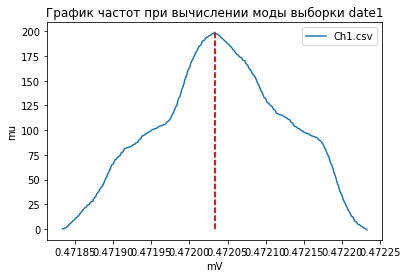

<Figure size 432x288 with 0 Axes>

In [84]:
    mode1, modefreq1, freqs1, Ss1 = find_mode(data1_fixed)
    print("Mode(s):", mode1)
    print("Frequency:", modefreq1)
    #print("freqs:", freqs1)
    #print("Ss:", Ss1)

    mode, modefreq, freqs, Ss= mode1, modefreq1, freqs1, Ss1
    
    plt.plot(Ss, freqs, label='Ch1.csv')
    plt.plot([mode[0][0], mode[0][0]], [0, modefreq], '--r')  # первая пунктирная красная линия
    plt.plot([mode[0][1], mode[0][1]], [0, modefreq], '--r')  # вторая пунктирная красная линия
    plt.legend()
    plt.title('График частот при вычислении моды выборки date1')
    plt.xlabel('mV')
    plt.ylabel('mu')
    plt.savefig("report/pics/data1_mode.png")
    plt.figure()

In [14]:
data1_fixed = [[data1_e[i][0] - data1_B * data_n[i], data1_e[i][1] - data1_B * data_n[i]] for i in range(len(data1))]
data2_fixed = [[data2_e[i][0] - data2_B * data_n[i], data2_e[i][1] - data2_B * data_n[i]] for i in range(len(data2))]

<Figure size 432x288 with 0 Axes>

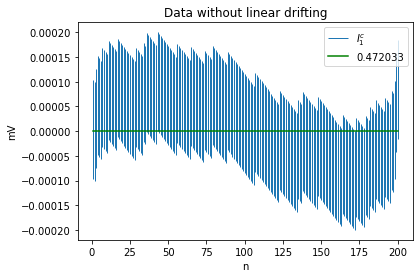

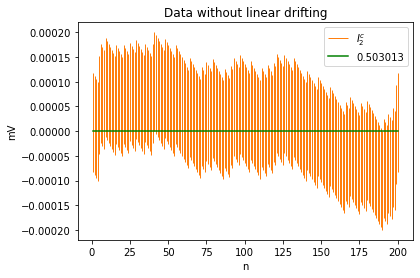

<Figure size 432x288 with 0 Axes>

In [30]:
    #вычла чтобы было отображение около 0, вместо [data2_A, data2_A]
    data1_fixed = [[data1_e[i][0] - data1_B * data_n[i] - data1_A, data1_e[i][1] - data1_B * data_n[i] - data1_A] for i in range(len(data1))]
    data2_fixed = [[data2_e[i][0] - data2_B * data_n[i] - data2_A, data2_e[i][1] - data2_B * data_n[i] - data2_A] for i in range(len(data2))]
    # plot first
    for i in range(len(data1_fixed)):
        plot_interval(data1_fixed[i], data_n[i], "C0", "$I_1^c$")

    plt.plot([data_n[0], data_n[-1]], [0, 0], color='green', label=str(data1_A))
    plt.legend()
    plt.title('Data without linear drifting')
    plt.xlabel('n')
    plt.ylabel('mV')
    plt.savefig("report/pics/data1_const.png")
    plt.figure()
    
    # plot second
    for i in range(len(data2_fixed)):
        plot_interval(data2_fixed[i], data_n[i], "C1", "$I_2^c$")

    plt.plot([data_n[0], data_n[-1]], [0, 0], color='green', label=str(data2_A))
    plt.legend()
    plt.xlabel('n')
    plt.ylabel('mV')
    plt.title('Data without linear drifting')
    plt.savefig("report/pics/data2_const.png")
    plt.figure()

# Регрессия

In [11]:
    data1_AZ, data1_BZ, data1_wZ = load_octave('data/ChZ1.txt')
    data2_AZ, data2_BZ, data2_wZ = load_octave('data/ChZ2.txt')
    data1_yintZ1 = load_octave_yint('data/yintZ1.txt')
    data2_yintZ2 = load_octave_yint('data/yintZ2.txt')
    
    #print(len(data1_yint1), len(data2_yint2))
    #print(data2_yint2)
    print(data1_wZ)

[1.03886, 1.06969, 0.802517, 0.534345, 0.565172, 0.596, 0.328828, 0.359655, 0.390483, 0.42131, 0.154138, 0.184966, 0.215793, 0.246621, 0.277448, 0.308276, 0.0411034, 0.071931, 0.102759, 0.133586, 0.164414, 0.195241, 0.226069, 0.256897, 0.287724, 0.318552, 0.349379, 0.380207, 0.113034, 0.143862, 0.17469, 0.205517, 0.236345, 0.0308276, 0.0, 0.267172, 0.236345, 0.205517, 0.17469, 0.143862, 0.113034, 0.0822069, 0.349379, 0.318552, 0.287724, 0.256897, 0.226069, 0.195241, 0.164414, 0.133586, 0.102759, 0.071931, 0.0411034, 0.0102759, 0.0205517, 0.246621, 0.215793, 0.184966, 0.154138, 0.12331, 0.0924828, 0.0616552, 0.0308276, 0.0, 0.267172, 0.236345, 0.205517, 0.17469, 0.143862, 0.113034, 0.0822069, 0.0513793, 0.0205517, 0.287724, 0.256897, 0.226069, 0.195241, 0.164414, 0.431586, 0.400759, 0.369931, 0.339103, 0.308276, 0.277448, 0.246621, 0.215793, 0.184966, 0.154138, 0.42131, 0.390483, 0.359655, 0.328828, 0.298, 0.267172, 0.236345, 0.205517, 0.17469, 0.143862, 0.113034, 0.0822069, 0.0513793, 

In [12]:
    data1_rZ = [[data1[i][0] - data1_wZ[i] * EPS, data1[i][1] + data1_wZ[i] * EPS] for i in range(len(data1))]
    data2_rZ = [[data2[i][0] - data2_wZ[i] * EPS, data2[i][1] + data2_wZ[i] * EPS] for i in range(len(data2))]

<Figure size 432x288 with 0 Axes>

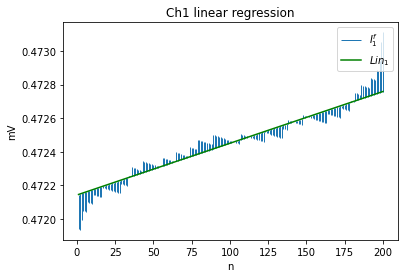

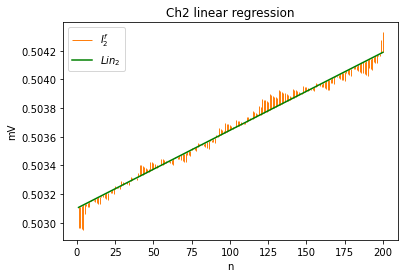

<Figure size 432x288 with 0 Axes>

In [235]:
    # plot first
    for i in range(len(data1_rZ)):
        plot_interval(data1_rZ[i], data_n[i], 'C0', "$I_1^f$")

    plt.plot([data_n[0], data_n[-1]], [data_n[0] * data1_BZ + data1_AZ, data_n[-1] * data1_BZ + data1_AZ], color='green',
             label="$Lin_1$")

    plt.legend()
    plt.title('Ch1 linear regression')
    plt.xlabel('n')
    plt.ylabel('mV')
    plt.savefig("report/pics/data1_fixed.png")
    plt.figure()


    # plot second
    for i in range(len(data2_rZ)):
        plot_interval(data2_rZ[i], data_n[i], 'C1', "$I_2^f$")
        
    plt.plot([data_n[0], data_n[-1]], [data_n[0] * data2_BZ + data2_AZ, data_n[-1] * data2_BZ + data2_AZ], color='green',
             label="$Lin_2$")

    plt.legend()
    plt.title('Ch2 linear regression')
    plt.xlabel('n')
    plt.ylabel('mV')
    plt.savefig("report/pics/data2_fixed.png")
    plt.figure()

In [13]:
data1_fixedZ = [[data1_e[i][0] - data1_BZ * data_n[i], data1_e[i][1] - data1_BZ * data_n[i]] for i in range(len(data1))]
data2_fixedZ = [[data2_e[i][0] - data2_BZ * data_n[i], data2_e[i][1] - data2_BZ * data_n[i]] for i in range(len(data2))]

<Figure size 432x288 with 0 Axes>

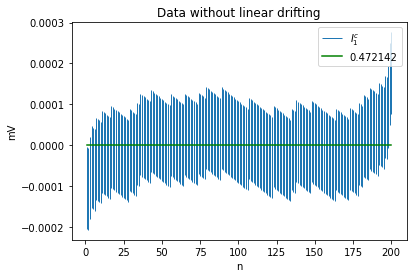

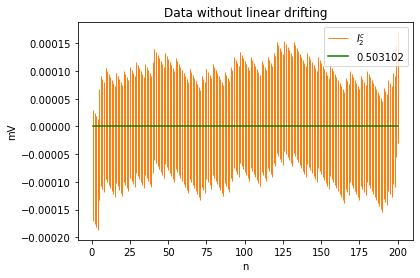

<Figure size 432x288 with 0 Axes>

In [237]:
    #вычла чтобы было отображение около 0, вместо [data2_A, data2_A]
    data1_fixedZ = [[data1_e[i][0] - data1_BZ * data_n[i] - data1_AZ, data1_e[i][1] - data1_BZ * data_n[i] - data1_AZ] for i in range(len(data1))]
    data2_fixedZ = [[data2_e[i][0] - data2_BZ * data_n[i] - data2_AZ, data2_e[i][1] - data2_BZ * data_n[i] - data2_AZ] for i in range(len(data2))]
    # plot first
    for i in range(len(data1_fixedZ)):
        plot_interval(data1_fixedZ[i], data_n[i], "C0", "$I_1^c$")

    plt.plot([data_n[0], data_n[-1]], [0, 0], color='green', label=str(data1_AZ))
    plt.legend()
    plt.title('Data without linear drifting')
    plt.xlabel('n')
    plt.ylabel('mV')
    plt.savefig("report/pics/data1_const.png")
    plt.figure()
    
    # plot second
    for i in range(len(data2_fixedZ)):
        plot_interval(data2_fixedZ[i], data_n[i], "C1", "$I_2^c$")

    plt.plot([data_n[0], data_n[-1]], [0, 0], color='green', label=str(data2_AZ))
    plt.legend()
    plt.xlabel('n')
    plt.ylabel('mV')
    plt.title('Data without linear drifting')
    plt.savefig("report/pics/data2_const.png")
    plt.figure()

<Figure size 432x288 with 0 Axes>

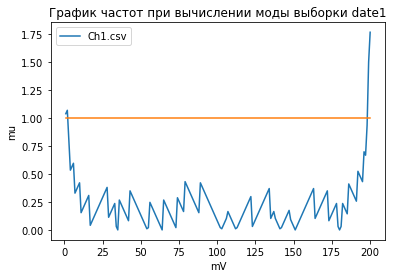

<Figure size 432x288 with 0 Axes>

In [19]:
    plt.plot(data_n, data1_wZ, label='Ch1.csv')
    plt.plot(data_n, data1_w)
    plt.legend()
    plt.title('График частот при вычислении моды выборки date1')
    plt.xlabel('mV')
    plt.ylabel('mu')
    plt.savefig("report/pics/data1_mode.png")
    plt.figure()

In [23]:
ji1Z = countJakkar(data1_fixedZ)
ji2Z = countJakkar(data2_fixedZ)

print(ji1Z, ji2Z)

-0.1730642550574791 0.1214004587201111


In [238]:
mode1, modefreq1, freqs1, Ss1 = find_mode(data1_fixedZ)
print("Mode(s):", mode1)
print("Frequency:", modefreq1)
print("freqs:", freqs1)
print("Ss:", Ss1)

Mode(s): [[-3.052096000000226e-05, -7.365520000024439e-06], [-6.886480000023454e-06, -4.282760000029473e-06]]
Frequency: 196
freqs: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 19

<Figure size 432x288 with 0 Axes>

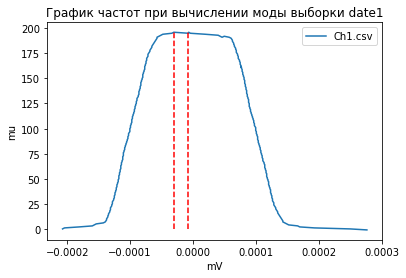

<Figure size 432x288 with 0 Axes>

In [25]:
    mode, modefreq, freqs, Ss= mode1, modefreq1, freqs1, Ss1
    
    plt.plot(Ss, freqs, label='Ch1.csv')
    plt.plot([mode[0][0], mode[0][0]], [0, modefreq], '--r')  # первая пунктирная красная линия
    plt.plot([mode[0][1], mode[0][1]], [0, modefreq], '--r')  # вторая пунктирная красная линия
    plt.legend()
    plt.title('График частот при вычислении моды выборки date1')
    plt.xlabel('mV')
    plt.ylabel('mu')
    plt.savefig("report/pics/data1_mode.png")
    plt.figure()

In [28]:
mode1, modefreq1, freqs1, Ss1 = find_mode(data2_fixedZ)
print("Mode(s):", mode1)
print("Frequency:", modefreq1)
#print("freqs:", freqs1)
#print("Ss:", Ss1)

Mode(s): [[-2.994200000006053e-05, 1.3361159999947247e-05]]
Frequency: 199


<Figure size 432x288 with 0 Axes>

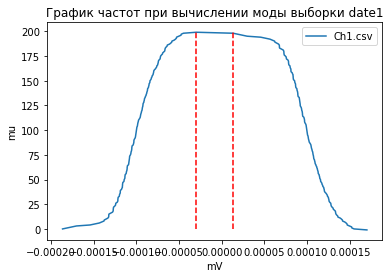

<Figure size 432x288 with 0 Axes>

In [29]:
    mode, modefreq, freqs, Ss= mode1, modefreq1, freqs1, Ss1
    
    plt.plot(Ss, freqs, label='Ch1.csv')
    plt.plot([mode[0][0], mode[0][0]], [0, modefreq], '--r')  # первая пунктирная красная линия
    plt.plot([mode[0][1], mode[0][1]], [0, modefreq], '--r')  # вторая пунктирная красная линия
    plt.legend()
    plt.title('График частот при вычислении моды выборки date1')
    plt.xlabel('mV')
    plt.ylabel('mu')
    plt.savefig("report/pics/data1_mode.png")
    plt.figure()

In [243]:
data1_e_min = min([x[0] for x in data1_fixedZ])
data1_e_max = max([x[1] for x in data1_fixedZ])

data2_e_min = min([x[0] for x in data2_fixedZ])
data2_e_max = max([x[1] for x in data2_fixedZ])
print (data1_e_min, data1_e_max)
print (data2_e_min, data2_e_max)

j1 = data1_e_max - data1_e_min
j2 = data2_e_max - data2_e_min
print(j1, j2)

r_out1 = data2_e_min / data1_e_max
r_out2 = data2_e_max / data1_e_min
print(r_out1)
print(r_out2)

wid_r_out = r_out2 - r_out1
print(wid_r_out)

0.47193463448 0.472418348
0.50291536116 0.503272058
0.00048371351999998424 0.00035669683999994817
1.064555098863349
1.066402042211903
0.0018469433485539533


# Кусочно линейная регрессия

In [14]:
def read_data(filename):
    data_list = []

    with open(filename, 'r') as file:
        data = file.read().split(',')
        data_list = [[float(item), float(item)] for item in data]

    return data_list


In [15]:
data1_kr = read_data('C:/Users/arina/Documents/funny/Solar-Data-main/Ch1.txt')
data2_kr = read_data('C:/Users/arina/Documents/funny/Solar-Data-main/Ch2.txt')
#print(len(data2_new))

data1_new = [[data1_kr[i][0] - EPS, data1_kr[i][1] + EPS] for i in range(len(data1))]
data2_new = [[data2_kr[i][0] - EPS, data2_kr[i][1] + EPS] for i in range(len(data2))]

<Figure size 432x288 with 0 Axes>

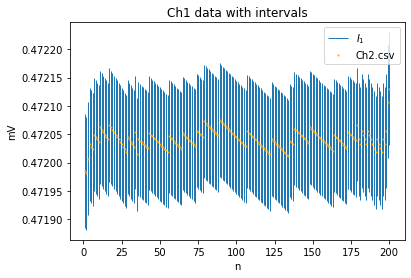

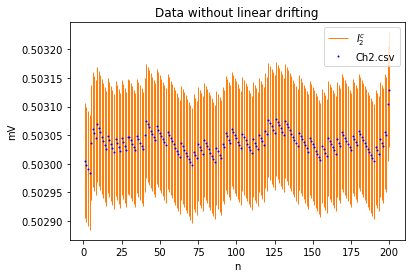

<Figure size 432x288 with 0 Axes>

In [16]:

    # plot first
    for i in range(len(data1_new)):
        plot_interval(data1_new[i], data_n[i], 'C0', "$I_1$")
        
    #plt.plot(data_n, [data1_new[i][0] for i in range(len(data1_new))], label='Ch1.csv')
    plt.plot(data_n, [data1_kr[i][0] for i in range(len(data2))], 'o', markersize=1, color ="orange", label='Ch2.csv')
    plt.legend()
    plt.title('Ch1 data with intervals')
    plt.xlabel('n')
    plt.ylabel('mV')
    plt.savefig("report/pics/data1_interval.png")
    #plt.axis([0,200, 0.1005, 0.1020])
    plt.figure()

    # plot second
    for i in range(len(data2_new)):
        plot_interval(data2_new[i], data_n[i], "C1", "$I_2^c$")

    #plt.plot([data_n[0], data_n[-1]], [0, 0], color='green', label=str(data2_AZ))
    plt.plot(data_n, [data2_kr[i][0] for i in range(len(data2))], 'o', markersize=1, color ="blue", label='Ch2.csv')
    plt.legend()
    plt.xlabel('n')
    plt.ylabel('mV')
    plt.title('Data without linear drifting')
    plt.savefig("report/pics/data2_const.png")
    plt.figure()

In [18]:
ji1Z = countJakkar(data1_new)
ji2Z = countJakkar(data2_new)

print(ji1Z, ji2Z)

0.1458034947009263 0.15881202291805835


Mode(s): [[0.4720301999999999, 0.4720811]]
Frequency: 199


<Figure size 432x288 with 0 Axes>

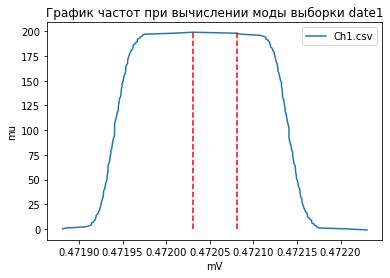

<Figure size 432x288 with 0 Axes>

In [36]:
    mode1, modefreq1, freqs1, Ss1 = find_mode(data1_new)
    print("Mode(s):", mode1)
    print("Frequency:", modefreq1)
    mode, modefreq, freqs, Ss= mode1, modefreq1, freqs1, Ss1
    
    plt.plot(Ss, freqs, label='Ch1.csv')
    plt.plot([mode[0][0], mode[0][0]], [0, modefreq], '--r')  # первая пунктирная красная линия
    plt.plot([mode[0][1], mode[0][1]], [0, modefreq], '--r')  # вторая пунктирная красная линия
    plt.legend()
    plt.title('График частот при вычислении моды выборки date1')
    plt.xlabel('mV')
    plt.ylabel('mu')
    plt.savefig("report/pics/data1_mode.png")
    plt.figure()

Mode(s): [[0.5030296928571429, 0.5030845117647059]]
Frequency: 199


<Figure size 432x288 with 0 Axes>

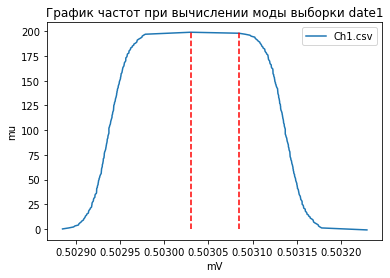

<Figure size 432x288 with 0 Axes>

In [68]:
    mode1, modefreq1, freqs1, Ss1 = find_mode(data2_new)
    print("Mode(s):", mode1)
    print("Frequency:", modefreq1)
    mode, modefreq, freqs, Ss= mode1, modefreq1, freqs1, Ss1
    
    plt.plot(Ss, freqs, label='Ch1.csv')
    plt.plot([mode[0][0], mode[0][0]], [0, modefreq], '--r')  # первая пунктирная красная линия
    plt.plot([mode[0][1], mode[0][1]], [0, modefreq], '--r')  # вторая пунктирная красная линия
    plt.legend()
    plt.title('График частот при вычислении моды выборки date1')
    plt.xlabel('mV')
    plt.ylabel('mu')
    plt.savefig("report/pics/data1_mode.png")
    plt.figure()

# Объединяем

In [17]:
def mode(R):
    data1_n = [[data1_new[i][0] * R, data1_new[i][1] * R] for i in range(len(data1_new))]
    all_data = data1_n + data2_new
    n = len(all_data)
    bounds = [[interval[0], 1] for interval in all_data] + [[interval[1], -1] for interval in all_data]
    bounds_sorted = sorted(bounds, key=lambda x: x[0])
    freqs = [0] * (2 * n)
    for i in range(1, len(bounds_sorted)):
        freqs[i] = freqs[i-1] + bounds_sorted[i][1]
    Ss = [bounds_sorted[i][0] for i in range(len(bounds_sorted))]
    modefreq = max(freqs)
    argmax = [i for i, freq in enumerate(freqs) if freq == modefreq]
    mode = [[Ss[arg], Ss[arg+1]] for arg in argmax]
    #return mode, modefreq, freqs, Ss, n
    return modefreq

In [26]:
 all_data = data1_new + data2_new

Mode(s): [[0.4720301999999999, 0.4720811], [0.5030296928571429, 0.5030845117647059]]
Frequency: 199


<Figure size 432x288 with 0 Axes>

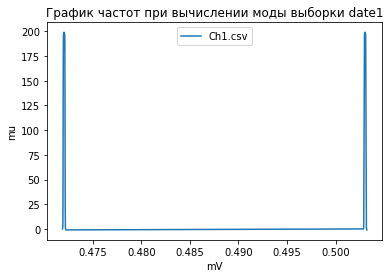

<Figure size 432x288 with 0 Axes>

In [25]:
    all_data = data1_new + data2_new

    mode1, modefreq1, freqs1, Ss1 = find_mode(all_data)
    print("Mode(s):", mode1)
    print("Frequency:", modefreq1)
    #print("freqs:", freqs1)
    #print("Ss:", Ss1)
    plt.plot(Ss1, freqs1, label='Ch1.csv')
    #plt.plot([mode[0][0], mode[0][0]], [0, modefreq], '--r')  # первая пунктирная красная линия
    #plt.plot([mode[0][1], mode[0][1]], [0, modefreq], '--r')  # вторая пунктирная красная линия
    plt.legend()
    plt.title('График частот при вычислении моды выборки date1')
    plt.xlabel('mV')
    plt.ylabel('mu')
    plt.savefig("report/pics/data1_mode.png")
    plt.figure()

In [219]:
#len(freqs1)
len(all_data)

400

In [18]:
R_interval = [0.00001 * i + 1.057 for i in range(2000)]
mu = []


for R in R_interval:
    #data1_n = [[data1_new[i][0] * R, data1_new[i][1] * R] for i in range(len(data1_new))]
    #all_data = data1_n + data2_new
    mu.append(mode(R))

#optimal_x = opt.fmin(lambda x: mode(x), 0)
#optimal_x = opt.fmin(lambda x: [-mode(x)[1], -mode(x)[3]], [0, 0, 0, 0])
#print(optimal_x[0])

In [41]:
#max(R_interval)
max(mu)

399

<Figure size 432x288 with 0 Axes>

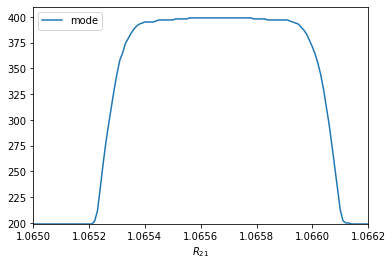

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(R_interval, mu, label="mode", zorder=1)
#plt.scatter(optimal_x[0], mode(optimal_x[0]), label="optimal point at R")
plt.legend()
plt.xlabel('$R_{21}$')
plt.axis([1.0650,1.0662, 199, 410])
plt.savefig("report/pics/jakkar.png")
plt.figure()

## Оскорбин 

In [20]:
def oskorbin(R):
    data1_n = [[data1_new[i][0] * R, data1_new[i][1] * R] for i in range(len(data1_new))]
    all_data = data1_n + data2_new
    n = len(all_data)
    y = np.mean(all_data, axis=1)
    e = np.diff(all_data, axis=1) / 2
    A = np.vstack((np.hstack((np.ones((n, 1)), -e)),
                   np.hstack((-np.ones((n, 1)), -e))))
    b = np.hstack((y, -y))
    c = np.array([0, 1])
    bounds = ((None, None), (0, None))
    res = linprog(c, A_ub=A, b_ub=b, bounds=bounds)
    if res.success:
        oskorbin_center, k = res.x
        return k
    else:
        return None, None

In [21]:
R_interval = [0.00001 * i + 1.057 for i in range(2000)]
k = []

for R in R_interval:
    k.append(oskorbin(R))

optimal_x = opt.fmin(lambda x: oskorbin(x), 0)
print(optimal_x[0])

C:\Users\arina\anaconda3\lib\site-packages\numpy\core\_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)
C:\Users\arina\anaconda3\lib\site-packages\numpy\lib\function_base.py:1255: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = asanyarray(a)


Optimization terminated successfully.
         Current function value: 0.745500
         Iterations: 29
         Function evaluations: 58
1.065671875000001


In [27]:
min(k)

0.7454999999993853

<Figure size 432x288 with 0 Axes>

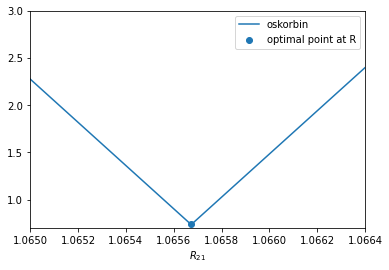

<Figure size 432x288 with 0 Axes>

In [22]:
plt.plot(R_interval, k, label="oskorbin", zorder=1)
plt.scatter(optimal_x[0], oskorbin(optimal_x[0]), label="optimal point at R")
plt.legend()
plt.xlabel('$R_{21}$')
plt.axis([1.0650,1.0664, 0.7, 3])
plt.savefig("report/pics/jakkar.png")
plt.figure()

## Жаккар

In [23]:
    R_interval = [0.00001 * i + 1.057 for i in range(2000)]
    Jaccars = []
def Jakkar(R):
        data1_n = [[data1_new[i][0] * R, data1_new[i][1] * R] for i in range(len(data1_new))]
        all_data = data1_n + data2_new
        min_inc = list(all_data[0])
        max_inc = list(all_data[0])
        for interval in all_data:
            min_inc[0] = max(min_inc[0], interval[0])
            min_inc[1] = min(min_inc[1], interval[1])
            max_inc[0] = min(max_inc[0], interval[0])
            max_inc[1] = max(max_inc[1], interval[1])
        JK = (min_inc[1] - min_inc[0]) / (max_inc[1] - max_inc[0])
        return JK


    for R in R_interval:
        Jaccars.append(Jakkar(R))

    optimal_x = opt.fmin(lambda x: -Jakkar(x), 0)
    print(optimal_x[0])

    min1 = opt.root(Jakkar, 1)
    max1 = opt.root(Jakkar, 2)
    print(min1.x, max1.x)

Optimization terminated successfully.
         Current function value: -0.145803
         Iterations: 31
         Function evaluations: 62
1.065672851562501
[1.06578882] [2.]


In [35]:
max(Jaccars)

0.14239076225480257

<Figure size 432x288 with 0 Axes>

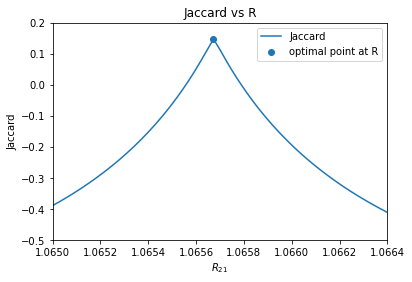

<Figure size 432x288 with 0 Axes>

In [24]:
    plt.plot(R_interval, Jaccars, label="Jaccard", zorder=1)
    plt.scatter(optimal_x[0], Jakkar(optimal_x[0]), label="optimal point at R")
    #plt.scatter(min1.x, Jakkar(min1.x), label="$min_R$=" + str(min1.x[0])[0:7], color="r", zorder=2)
    #plt.scatter(max1.x, Jakkar(max1.x), label="$max_R$=" + str(max1.x[0])[0:7], color="r", zorder=2)
    plt.legend()
    plt.xlabel('$R_{21}$')
    plt.ylabel('Jaccard')
    plt.title('Jaccard vs R')
    plt.axis([1.0650,1.0664, -0.5, 0.2])
    plt.savefig("report/pics/jakkar.png")
    plt.figure()

# argT

In [27]:
JK_array = [(1 + j) / 2 for j in Jaccars]  
k_array = [1 / x for x in k]  
mu_array = [x / len(all_data) for x in mu]

<Figure size 432x288 with 0 Axes>

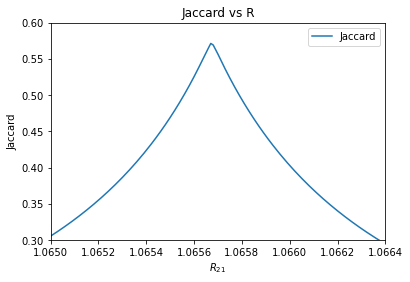

<Figure size 432x288 with 0 Axes>

In [28]:
    plt.plot(R_interval, JK_array, label="Jaccard", zorder=1)
    #plt.scatter(optimal_x[0], Jakkar(optimal_x[0]), label="optimal point at R")
    #plt.scatter(min1.x, Jakkar(min1.x), label="$min_R$=" + str(min1.x[0])[0:7], color="r", zorder=2)
    #plt.scatter(max1.x, Jakkar(max1.x), label="$max_R$=" + str(max1.x[0])[0:7], color="r", zorder=2)
    plt.legend()
    plt.xlabel('$R_{21}$')
    plt.ylabel('Jaccard')
    plt.title('Jaccard vs R')
    plt.axis([1.0650,1.0664, 0.3, 0.6])
    plt.savefig("report/pics/jakkar.png")
    plt.figure()

<Figure size 432x288 with 0 Axes>

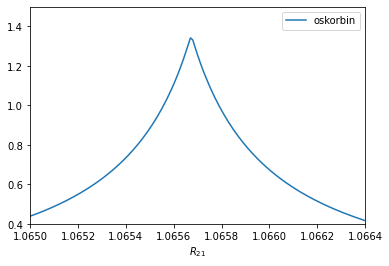

<Figure size 432x288 with 0 Axes>

In [29]:
plt.plot(R_interval, k_array, label="oskorbin", zorder=1)
#plt.scatter(optimal_x[0], oskorbin(optimal_x[0]), label="optimal point at R")
plt.legend()
plt.xlabel('$R_{21}$')
plt.axis([1.0650,1.0664, 0.4, 1.5])
plt.savefig("report/pics/jakkar.png")
plt.figure()

<Figure size 432x288 with 0 Axes>

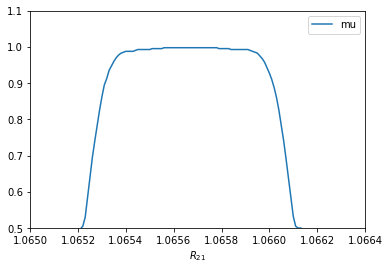

<Figure size 432x288 with 0 Axes>

In [30]:
plt.plot(R_interval, mu_array, label="mu", zorder=1)
#plt.scatter(optimal_x[0], oskorbin(optimal_x[0]), label="optimal point at R")
plt.legend()
plt.xlabel('$R_{21}$')
plt.axis([1.0650,1.0664, 0.5, 1.1])
plt.savefig("report/pics/jakkar.png")
plt.figure()

In [ ]:
T = [a * b * c for a, b, c in zip(JK_array, k_array, mu_array)]

In [ ]:
    plt.plot(R_interval, T, label="T", zorder=1)
    #plt.scatter(optimal_x[0], Jakkar(optimal_x[0]), label="optimal point at R")
    #plt.scatter(min1.x, Jakkar(min1.x), label="$min_R$=" + str(min1.x[0])[0:7], color="r", zorder=2)
    #plt.scatter(max1.x, Jakkar(max1.x), label="$max_R$=" + str(max1.x[0])[0:7], color="r", zorder=2)
    plt.legend()
    plt.xlabel('$R_{21}$')
    plt.ylabel('T')
    plt.title('Jaccard vs R')
    plt.axis([1.0650,1.0664, 0.3, 0.8])
    plt.savefig("report/pics/jakkar.png")
    plt.figure()